In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [3]:
boston_df['PRICE'] = boston.target
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [4]:
y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
neg_mse_scores

array([-11.4217962 , -24.29446706, -28.14355069, -74.59916618,
       -28.51714218])

In [6]:
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print("RMSE Scores= ",rmse_scores)
print("Average RMSE= ",avg_rmse)

RMSE Scores=  [3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
Average RMSE=  5.518166280868968


In [7]:
# Change Alpha Value

In [8]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print('Alpha {0}, 5-fold AVG RMSE: {1}'.format(alpha, avg_rmse))
    

Alpha 0, 5-fold AVG RMSE: 5.828658946215809
Alpha 0.1, 5-fold AVG RMSE: 5.7884866270324125
Alpha 1, 5-fold AVG RMSE: 5.652570965613546
Alpha 10, 5-fold AVG RMSE: 5.518166280868968
Alpha 100, 5-fold AVG RMSE: 5.329589628472143


In [9]:
# Visualization of coefficients

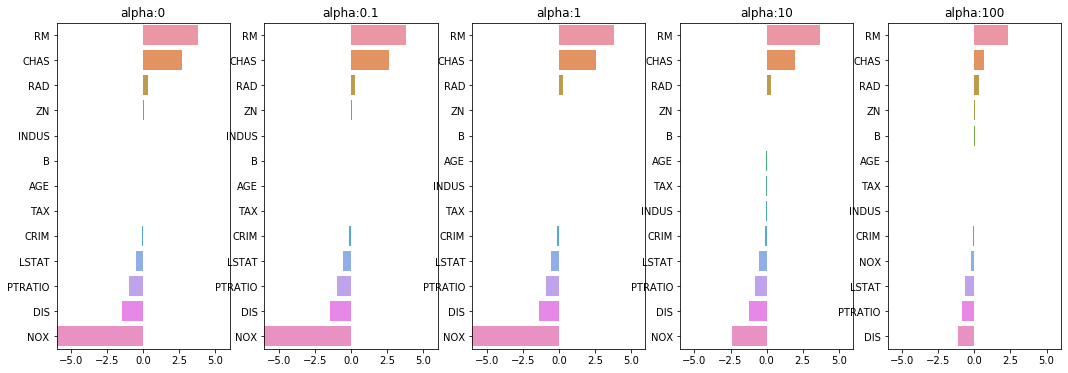

           alpha:0  alpha:0.1    alpha:1  alpha:10  alpha:100
RM        3.809865   3.818233   3.854000  3.702272   2.334536
CHAS      2.686734   2.670019   2.552393  1.952021   0.638335
RAD       0.306049   0.303515   0.290142  0.279596   0.315358
ZN        0.046420   0.046572   0.047443  0.049579   0.054496
INDUS     0.020559   0.015999  -0.008805 -0.042962  -0.052826
B         0.009312   0.009368   0.009673  0.010037   0.009393
AGE       0.000692  -0.000269  -0.005415 -0.010707   0.001212
TAX      -0.012335  -0.012421  -0.012912 -0.013993  -0.015856
CRIM     -0.108011  -0.107474  -0.104595 -0.101435  -0.102202
LSTAT    -0.524758  -0.525966  -0.533343 -0.559366  -0.660764
PTRATIO  -0.952747  -0.940759  -0.876074 -0.797945  -0.829218
DIS      -1.475567  -1.459626  -1.372654 -1.248808  -1.153390
NOX     -17.766611 -16.684645 -10.777015 -2.371619  -0.262847


In [10]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    # Perform Ridge
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)
    # Save coefficient to PD series
    coeff = pd.Series(data=ridge.coef_, index=X.columns)
    # Save the PD series to DataFrame with column name
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # Plot
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-6, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

sort_column = 'alpha:'+str(alphas[0])
print(coeff_df.sort_values(by=sort_column, ascending=False))

In [11]:
# The higer alpha, the smaller coefficient

In [12]:
# Lasso and Elastic Net

In [13]:
from sklearn.linear_model import Lasso, ElasticNet

In [14]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print('#######', model_name, '#######')
    
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name =='ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
            
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        
        print('Alpha {0}, 5-fold AVG RMSE: {1:.3f}'.format(param, avg_rmse))
        
        # Fit model to find coefficients
        model.fit(X_data_n, y_target_n)
        
        coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [15]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X, y_target_n=y)

sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

####### Lasso #######
Alpha 0.07, 5-fold AVG RMSE: 5.612
Alpha 0.1, 5-fold AVG RMSE: 5.615
Alpha 0.5, 5-fold AVG RMSE: 5.669
Alpha 1, 5-fold AVG RMSE: 5.776
Alpha 3, 5-fold AVG RMSE: 6.189


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [16]:
# ElasticNet with fixed l1ratio = 0.7

In [17]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

In [18]:
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X, y_target_n=y)

####### ElasticNet #######
Alpha 0.07, 5-fold AVG RMSE: 5.542
Alpha 0.1, 5-fold AVG RMSE: 5.526
Alpha 0.5, 5-fold AVG RMSE: 5.467
Alpha 1, 5-fold AVG RMSE: 5.597
Alpha 3, 5-fold AVG RMSE: 6.068


In [19]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [20]:
# Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import PolynomialFeatures

In [22]:
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [26]:
def get_linear_reg_eval_only(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print('#######', model_name, '#######')
    
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name =='ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
            
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        
        print('Alpha {0}, 5-fold AVG RMSE: {1:.3f}'.format(param, avg_rmse))

In [27]:
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

In [28]:
for scale_method in scale_methods:
    X_data_scaled=get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X)
    print('\n## Scaler:{0}, Polynomial Degree:{1}'.format(scale_method[0],scale_method[1]))
    get_linear_reg_eval_only('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y, verbose=False)


## Scaler:None, Polynomial Degree:None
Alpha 0.1, 5-fold AVG RMSE: 5.788
Alpha 1, 5-fold AVG RMSE: 5.653
Alpha 10, 5-fold AVG RMSE: 5.518
Alpha 100, 5-fold AVG RMSE: 5.330

## Scaler:Standard, Polynomial Degree:None
Alpha 0.1, 5-fold AVG RMSE: 5.826
Alpha 1, 5-fold AVG RMSE: 5.803
Alpha 10, 5-fold AVG RMSE: 5.637
Alpha 100, 5-fold AVG RMSE: 5.421

## Scaler:Standard, Polynomial Degree:2
Alpha 0.1, 5-fold AVG RMSE: 8.827
Alpha 1, 5-fold AVG RMSE: 6.871
Alpha 10, 5-fold AVG RMSE: 5.485
Alpha 100, 5-fold AVG RMSE: 4.634

## Scaler:MinMax, Polynomial Degree:None
Alpha 0.1, 5-fold AVG RMSE: 5.764
Alpha 1, 5-fold AVG RMSE: 5.465
Alpha 10, 5-fold AVG RMSE: 5.754
Alpha 100, 5-fold AVG RMSE: 7.635

## Scaler:MinMax, Polynomial Degree:2
Alpha 0.1, 5-fold AVG RMSE: 5.298
Alpha 1, 5-fold AVG RMSE: 4.323
Alpha 10, 5-fold AVG RMSE: 5.185
Alpha 100, 5-fold AVG RMSE: 6.538

## Scaler:Log, Polynomial Degree:None
Alpha 0.1, 5-fold AVG RMSE: 4.770
Alpha 1, 5-fold AVG RMSE: 4.676
Alpha 10, 5-fold AVG RMS